In [1]:
check = input('Can you confirm if this is correct? (y/n)').lower()
while check != 'y':
    check = input('Can you confirm if this is correct? (y/n)').lower()
else:
    print('Great! Thanks for confirming.')

Can you confirm if this is correct? (y/n)y
Great! Thanks for confirming.


In [2]:
import pandas as pd
df = pd.read_csv('simulated_ddos_data.csv')
df.head()

,magnitude,record_type,is_ddos,uuid,timestamp
0,3917.150671,normal,0,1,2020-07-01 00:01:00
1,9379.403504,normal,0,2,2020-07-01 00:02:00
2,1544.080967,normal,0,3,2020-07-01 00:03:00
3,3403.995906,normal,0,4,2020-07-01 00:04:00
4,4883.865333,normal,0,5,2020-07-01 00:05:00


In [24]:
df.record_type.unique()

array(['normal', 'DDoS'], dtype=object)

In [30]:
malicious = df.loc[df.is_ddos==1].copy().reset_index(drop=True)
malicious.head()

,magnitude,record_type,is_ddos,uuid,timestamp
0,24376.432653,DDoS,1,1,2020-07-01 00:01:00
1,26458.007847,DDoS,1,2,2020-07-01 00:02:00
2,25435.641576,DDoS,1,3,2020-07-01 00:03:00
3,23201.816407,DDoS,1,4,2020-07-01 00:04:00
4,20026.438697,DDoS,1,5,2020-07-01 00:05:00


In [21]:
malicious_magnitude = malicious.magnitude
malicious_magnitude

0      24376.432653
1      26458.007847
2      25435.641576
3      23201.816407
4      20026.438697
           ...     
295    25202.790795
296    22688.188677
297    23638.699952
298    24770.258531
299    25653.744755
Name: magnitude, Length: 300, dtype: float64

In [23]:
mal_mag = df.loc[df.is_ddos==1,'magnitude'].copy().reset_index(drop=True)
mal_mag

0      24376.432653
1      26458.007847
2      25435.641576
3      23201.816407
4      20026.438697
           ...     
295    25202.790795
296    22688.188677
297    23638.699952
298    24770.258531
299    25653.744755
Name: magnitude, Length: 300, dtype: float64

In [4]:
df.loc[df.is_ddos==1,'magnitude'].copy().reset_index(drop=True).median()

25117.52355716445

In [5]:
normal = df.loc[df.is_ddos==0,:].copy().reset_index(drop=True)
print(len(malicious.index), len(normal.index), len(malicious.index) + len(normal.index) )

300 86100 86400


In [6]:
sorted(list(df.is_ddos.unique()))

[0, 1]

In [7]:
normal.record_type.size

86100

In [8]:
import os

In [9]:
os.path.isdir('/home/kali/projects')

True

In [10]:
home = os.path.expanduser('~')
os.path.isdir(f'{home}/projects')


True

In [11]:
os.path.expanduser('~')

'/home/kali'

In [12]:
os.path.isdir(os.path.join(home, 'cream'))

False

In [13]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import math

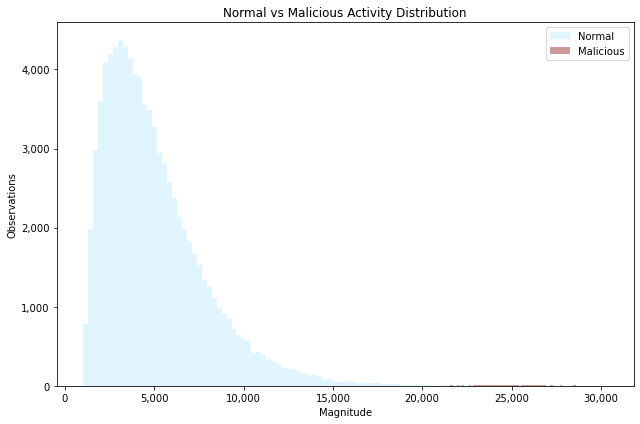

In [14]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.distplot(df.loc[df.is_ddos == 0, 'magnitude'], kde=False, bins=100, label='Normal', color='#b3e6ff')
sns.distplot(df.loc[df.is_ddos == 1, 'magnitude'], kde=False, bins=100, label='Malicious', color='#800000')
plt.xlabel('Magnitude')
plt.ylabel('Observations')
plt.title('Normal vs Malicious Activity Distribution')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend()
plt.tight_layout()
plt.savefig("test.png")

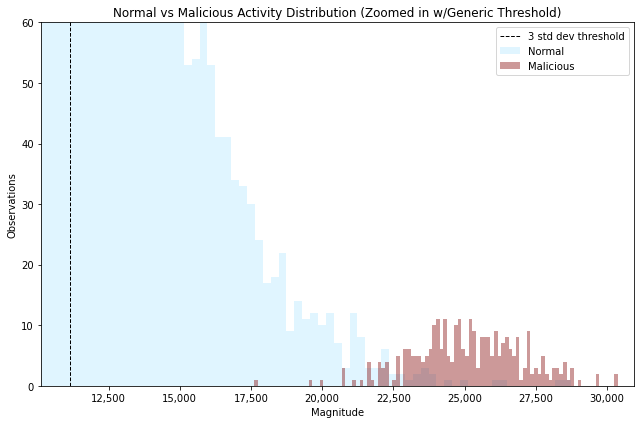

In [15]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.distplot(df.loc[df.is_ddos == 0, 'magnitude'], kde=False, bins=100, label='Normal', color='#b3e6ff')
sns.distplot(df.loc[df.is_ddos == 1, 'magnitude'], kde=False, bins=100, label='Malicious', color='#800000')
plt.xlabel('Magnitude')
plt.ylabel('Observations')
plt.title('Normal vs Malicious Activity Distribution (Zoomed in w/Generic Threshold)')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
norm_avg = 5015
norm_stdev = 2045
mal_avg = 25110
mal_stdev = 1940
plt.xlim(norm_avg + (2.5 * norm_stdev),mal_avg + (3 * mal_stdev))
plt.ylim(0,300*.20)
plt.axvline(x=norm_avg + (3 * norm_stdev), color='k', linestyle='dashed', linewidth=1, label='3 std dev threshold')
plt.legend()
plt.tight_layout()
plt.savefig("test.png")

In [16]:
est_mal_height = (1 / (mal_stdev * math.sqrt(2 * math.pi))) * mal_avg
print(est_mal_height)

5.163629206639163


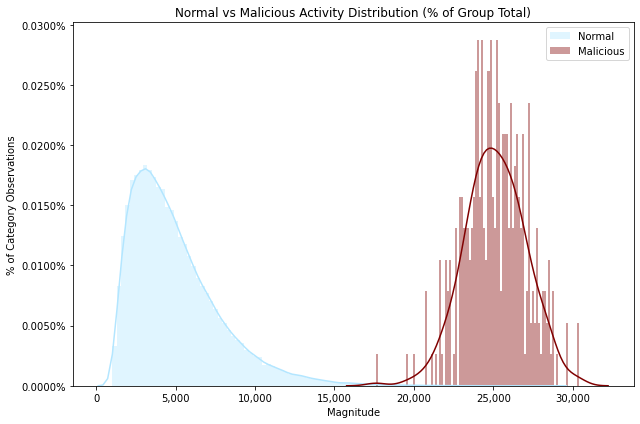

In [54]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.distplot(df.loc[df.is_ddos == 0, 'magnitude'], kde=True, bins=100, label='Normal', color='#b3e6ff')
sns.distplot(df.loc[df.is_ddos == 1, 'magnitude'], kde=True, bins=100, label='Malicious', color='#800000')
plt.xlabel('Magnitude')
plt.ylabel('% of Category Observations')
plt.title('Normal vs Malicious Activity Distribution (% of Group Total)')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()
plt.tight_layout()
plt.savefig("test.png")

In [18]:
true_positives = df[(df.is_ddos == 1) & (df.magnitude >= 12000)]
true_positives.shape[0]

300

In [19]:
import webbrowser
webbrowser.open_new_tab('/home/kali/cream/lol/exploratory_data_focused_histogram.png')

True

In [49]:
eval_df = pd.read_csv('simulation_scores.csv')
FN_ratio = 50
eval_df.head()

,multiplier,threshold,false_positives,false_negatives,precision,recall,f1_score,fp_cost,fn_cost,estimated_total_cost_thousands
0,3.0,13545,1229,0,0.1962,1.0,0.3280,409666.666667,0.0,409.666667
1,3.1,13829,1084,0,0.2168,1.0,0.3563,361333.333333,0.0,361.333333
2,3.2,14113,954,0,0.2392,1.0,0.3861,318000.000000,0.0,318.000000
3,3.3,14398,845,0,0.2620,1.0,0.4152,281666.666667,0.0,281.666667
4,3.4,14682,748,0,0.2863,1.0,0.4451,249333.333333,0.0,249.333333


In [50]:
eval_df['weighted_fn'] = eval_df.false_negatives * 10
eval_df['total_weighted_errors'] = eval_df.false_positives + eval_df.weighted_fn
eval_df['weighted_f1'] = (1 + FN_ratio) * (eval_df.precision * eval_df.recall) / \
    ((eval_df.precision * FN_ratio) + eval_df.recall)

eval_df.head()

,multiplier,threshold,false_positives,false_negatives,precision,recall,f1_score,fp_cost,fn_cost,estimated_total_cost_thousands,weighted_fn,total_weighted_errors,weighted_f1
0,3.0,13545,1229,0,0.1962,1.0,0.3280,409666.666667,0.0,409.666667,0,1229,0.925643
1,3.1,13829,1084,0,0.2168,1.0,0.3563,361333.333333,0.0,361.333333,0,1084,0.933851
2,3.2,14113,954,0,0.2392,1.0,0.3861,318000.000000,0.0,318.000000,0,954,0.941296
3,3.3,14398,845,0,0.2620,1.0,0.4152,281666.666667,0.0,281.666667,0,845,0.947660
4,3.4,14682,748,0,0.2863,1.0,0.4451,249333.333333,0.0,249.333333,0,748,0.953399


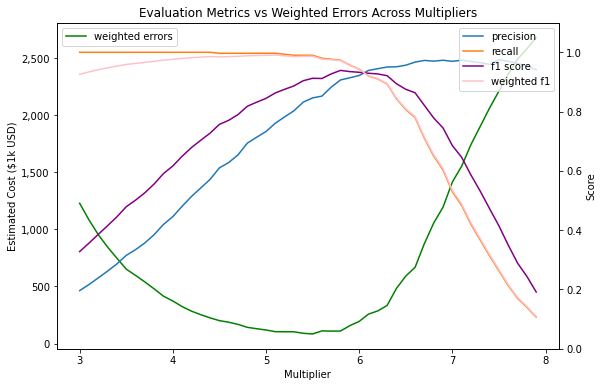

In [51]:
# Compare it to our evaluation metrics.

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.lineplot(x='multiplier', y='total_weighted_errors', data=eval_df, label='weighted errors', color='green', legend=False)
ax.set_ylabel('Estimated Cost ($1k USD)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_xlabel('Multiplier')

ax2 = ax.twinx()
sns.lineplot(x='multiplier', y='precision', ax=ax2, data=eval_df, label='precision', legend=False)
sns.lineplot(x='multiplier', y='recall', ax=ax2, data=eval_df, label='recall', legend=False)
sns.lineplot(x='multiplier', y='f1_score', ax=ax2, data=eval_df, label='f1 score', legend=False, color='purple')
sns.lineplot(x='multiplier', y='weighted_f1', ax=ax2, data=eval_df, label='weighted f1', legend=False, color='pink')

ax2.set_ylabel('Score')
ax2.set_ylim(0,1.1)
plt.legend(loc='upper right')

plt.title('Evaluation Metrics vs Weighted Errors Across Multipliers')
plt.show()